In [1]:
import pandas as pd
import mne
import numpy as np
from mne.channels import read_montage
from mne import create_info
from mne.io import RawArray
from mne.time_frequency import psd_welch

In [2]:
df = pd.read_csv('relaxed.csv')

In [3]:
df.head()

,timestamps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Marker
0,15992.229,16040.350,49338.750,62379.652,27263.004,-187500.016,-187500.016,-187500.016,-187500.016,0
1,15992.229,16034.717,49326.789,62468.812,27265.105,-187500.016,-187500.016,-187500.016,-187500.016,0
2,15992.229,16051.525,49316.242,62284.680,27260.367,-187500.016,-187500.016,-187500.016,-187500.016,0
3,15992.229,16054.699,49293.711,61927.496,27244.877,-187500.016,-187500.016,-187500.016,-187500.016,0
4,15992.230,16054.141,49314.586,61986.148,27247.336,-187500.016,-187500.016,-187500.016,-187500.016,0


In [4]:
df.shape

(5664, 10)

In [5]:
df.rename(columns={'Unnamed: 1':'Cz',
                          'Unnamed: 2':'P3',
                          'Unnamed: 3':'Pz', 'Unnamed: 4': 'P4'}, 
                 inplace=True)

In [6]:
df.head()

,timestamps,Cz,P3,Pz,P4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Marker
0,15992.229,16040.350,49338.750,62379.652,27263.004,-187500.016,-187500.016,-187500.016,-187500.016,0
1,15992.229,16034.717,49326.789,62468.812,27265.105,-187500.016,-187500.016,-187500.016,-187500.016,0
2,15992.229,16051.525,49316.242,62284.680,27260.367,-187500.016,-187500.016,-187500.016,-187500.016,0
3,15992.229,16054.699,49293.711,61927.496,27244.877,-187500.016,-187500.016,-187500.016,-187500.016,0
4,15992.230,16054.141,49314.586,61986.148,27247.336,-187500.016,-187500.016,-187500.016,-187500.016,0


In [7]:
df = df.drop(["Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"], axis=1)

In [8]:
df.head()

,timestamps,Cz,P3,Pz,P4,Marker
0,15992.229,16040.350,49338.750,62379.652,27263.004,0
1,15992.229,16034.717,49326.789,62468.812,27265.105,0
2,15992.229,16051.525,49316.242,62284.680,27260.367,0
3,15992.229,16054.699,49293.711,61927.496,27244.877,0
4,15992.230,16054.141,49314.586,61986.148,27247.336,0


In [9]:
sfreq = 250
ch_names = list(df.columns)[0:6]
ch_types = ['misc'] + ['eeg'] * 4 + ['stim']
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

In [10]:
ch_types, ch_names, ten_twenty_montage

(['misc', 'eeg', 'eeg', 'eeg', 'eeg', 'stim'],
 ['timestamps', 'Cz', 'P3', 'Pz', 'P4', 'Marker'],
 <DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>)

In [11]:
df = df.T

In [12]:
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,5654,5655,5656,5657,5658,5659,5660,5661,5662,5663
timestamps,15992.229,15992.229,15992.229,15992.229,15992.230,15992.230,15992.230,15992.230,15992.231,15992.231,...,16014.810,16014.810,16014.810,16014.810,16014.811,16014.811,16014.811,16014.811,16014.812,16014.812
Cz,16040.350,16034.717,16051.525,16054.699,16054.141,16041.378,16042.518,16058.298,16068.021,16057.002,...,16171.867,16161.228,16120.078,16083.734,16113.663,16179.377,16173.901,16129.019,16084.383,16110.198
P3,49338.750,49326.789,49316.242,49293.711,49314.586,49337.094,49326.230,49313.781,49304.527,49318.477,...,49495.480,49518.168,49433.699,49341.008,49362.086,49491.031,49519.082,49437.723,49341.766,49360.832
Pz,62379.652,62468.812,62284.680,61927.496,61986.148,62376.031,62458.730,62275.715,61924.590,61969.117,...,60496.785,61693.250,61238.148,59776.836,59140.996,60534.762,61733.016,61273.262,59800.371,59156.039
P4,27263.004,27265.105,27260.367,27244.877,27247.336,27256.254,27261.037,27257.773,27250.643,27246.934,...,27558.740,27555.812,27542.736,27525.459,27537.885,27561.602,27558.428,27542.869,27519.713,27528.766
Marker,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [13]:
df[:-1] *= -1e-6  #convert from uVolts to Volts

In [14]:
info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq,
                  montage=ten_twenty_montage)

DigMontage is a superset of info. 90 in DigMontage will be ignored. The ignored channels are: {'F2', 'PO10', 'O1', 'FCz', 'C6', 'CP4', 'T3', 'F8', 'CP3', 'A1', 'AF4', 'CPz', 'F10', 'FC5', 'T5', 'AF2', 'CP6', 'TP9', 'AFz', 'PO1', 'P10', 'T10', 'PO2', 'M2', 'AF3', 'P6', 'Iz', 'M1', 'FT10', 'F6', 'FC4', 'P1', 'O9', 'C4', 'Fz', 'FT9', 'AF8', 'P8', 'AF7', 'P7', 'Fpz', 'AF10', 'F1', 'C1', 'CP2', 'Fp2', 'T4', 'O2', 'FT7', 'AF1', 'F5', 'FC2', 'TP10', 'PO3', 'AF6', 'T8', 'F4', 'FT8', 'PO6', 'F7', 'PO5', 'C3', 'CP5', 'T7', 'C2', 'T6', 'P2', 'FC6', 'CP1', 'T9', 'P9', 'PO4', 'C5', 'PO8', 'AF5', 'AF9', 'F9', 'F3', 'Oz', 'P5', 'Fp1', 'TP7', 'PO7', 'PO9', 'FC1', 'TP8', 'O10', 'A2', 'FC3', 'POz'}


In [15]:
raw = mne.io.RawArray(df, info)

Creating RawArray with float64 data, n_channels=6, n_times=5664
    Range : 0 ... 5663 =      0.000 ...    22.652 secs
Ready.


Effective window size : 8.192 (s)


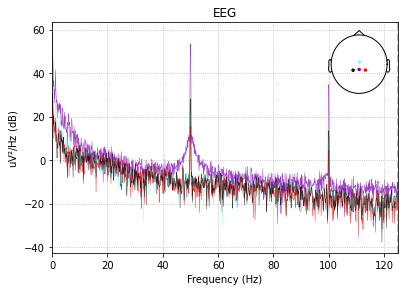

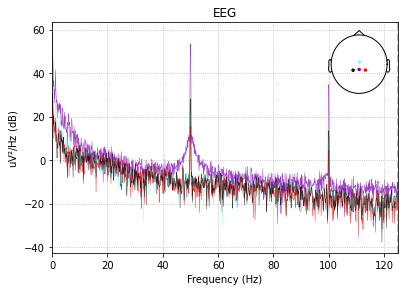

In [16]:
# compute the poweer spectral density (PSD) using 
# the MNE psd_welch function
# (this is simply a wrapper on scipy.signal.welch
#  that adds compatbility for MNE data types)

raw.plot_psd()

In [23]:
x = np.arange(50,100,20)

In [25]:
raw.notch_filter(50)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 sec)



<RawArray  |  None, n_channels x n_times : 6 x 5664 (22.7 sec), ~287 kB, data loaded>

Effective window size : 8.192 (s)


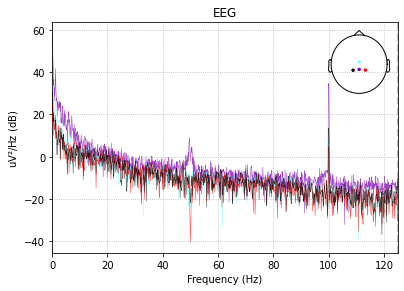

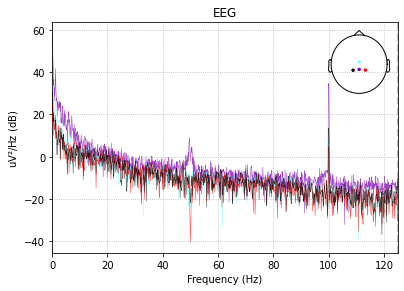

In [26]:
raw.plot_psd()